In [1]:
import numpy as np
import os
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow

plt.rcParams.update({
    'font.size': 14, 
    'lines.linewidth':4, 
    "figure.figsize": (80, 16)
})

In [2]:
pics = [
    'CG-IS-001 Box 09-10 (24.65 to 29.50)split.png',
    'CG-IS-005 Box 03-04 (5.40 to 11.30)split.png',
    'CH-IU-013 Box 01-02 (0.00 to 5.60)split.png'
]

## Examine the specs of the image

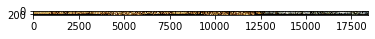

In [3]:
img1 = imread(os.path.join('imgs', pics[0]))
imshow(img1)

In [4]:
print(f'dims = {img1.shape}, max value = {img1.max()}, min value = {img1.min()}')

dims = (221, 18402, 3), max value = 1.0, min value = 0.0


### Make sure color sequence is R -> G -> B

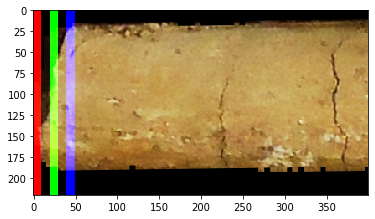

In [5]:
img1_head = img1[:, :400, :].copy()
img1_head[:, :10, 0] = 1.0
img1_head[:, 20:30, 1] = 1.0
img1_head[:, 40:50, 2] = 1.0
imshow(img1_head)

In [20]:
def colorIntensity(vals, title, ylabel):
    color_map = {0: 'r', 1: 'g', 2: 'b'}
    y_lim = (0, 1)
    fig = plt.figure(figsize = (80, 10))
    plt.ylim(y_lim)
    plt.ylabel(ylabel)
    plt.grid(True)
    for i in range(vals.shape[1]):
        plt.plot(vals[:, i], c = color_map[i])
    plt.title(title, fontsize = 40)
    plt.show()

The subplotting version of above feature:
```python
def colorIntensity(vals, title):
    color_map = {0: 'r', 1: 'g', 2: 'b'}
    y_lim = (0, 1)
    fig = plt.figure(figsize = (20, 8))
    fig.title(title)
    for i in range(vals.shape[1]):
        ax = fig.add_subplot(3, 1, i+1)
        ax.plot(vals[:, i], c = color_map[i])
        ax.set_ylim(y_lim)
        ax.grid(True)
    plt.show()
```

In [50]:
class ImageInfo():
    def __init__(self, ch_abs, ch_rel, pxl_range):
        assert ch_abs.shape[0] == ch_rel.shape[0] == len(pxl_range), \
            "Mismatched array dimensions"
        self.ch_abs = ch_abs
        self.ch_rel = ch_rel
        self.pxl_range = pxl_range
    def __repr__(self):
        return f"ImageInfo: ch_abs shape = {self.ch_abs.shape}, ch_rel shape = {self.ch_rel.shape}, {len(self.pxl_range)}"

In [51]:
def showChannels(inp):
    h, w, c = inp.shape
    channel_absolute = np.empty((0, c), float)
    channel_relative = np.empty((0, c), float)
    ranges = list()
    for i in range(w):
        col_slice = inp[:, i, :]
        all_color = col_slice.sum(axis = 1)
        min_step = 1 / 255
        valid_idx = np.argwhere(all_color >= min_step).ravel()
        valid_range = range(valid_idx[0], valid_idx[-1] + 1)
        ranges.append(valid_range)
        p = np.average(col_slice[valid_range], axis = 0)
        channel_absolute = np.vstack((channel_absolute, p))
        rel = p / np.sum(p)
        channel_relative = np.vstack((channel_relative, rel))
    colorIntensity(channel_absolute, 'Individual Brightness', '')
    colorIntensity(channel_relative, 'Relative Brightness', '%')
    return ImageInfo(channel_absolute, channel_relative, ranges)

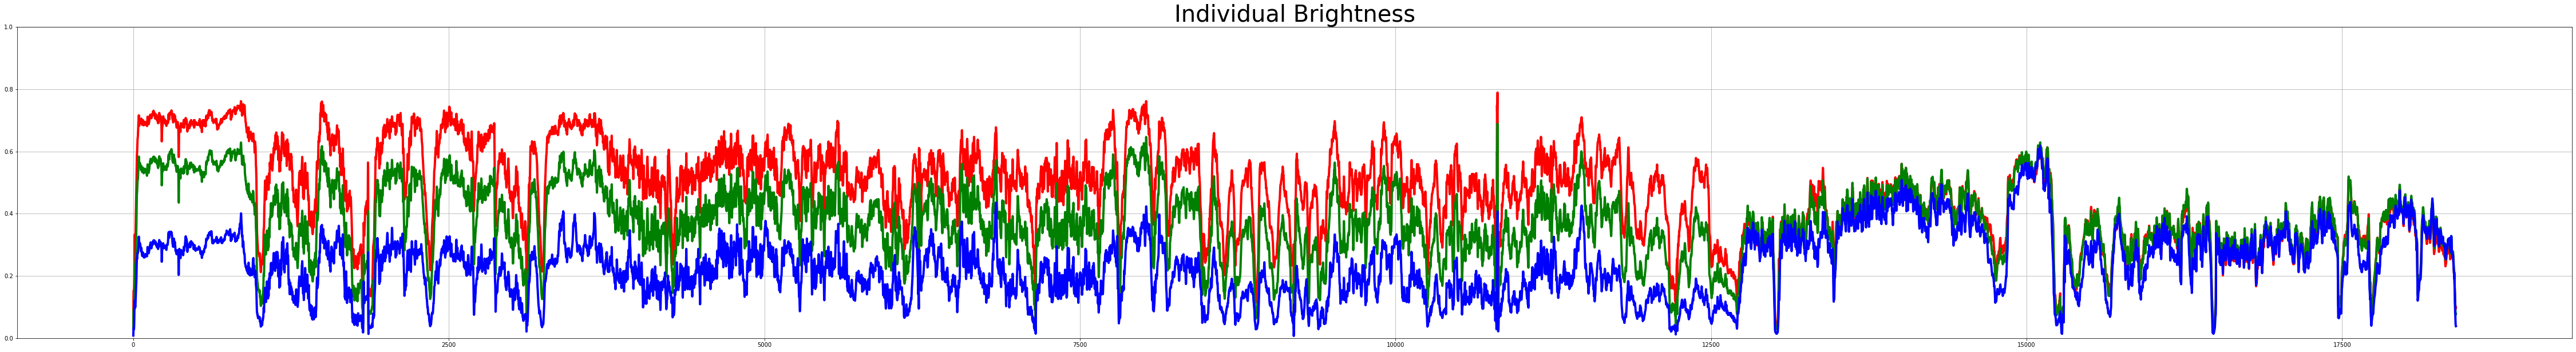

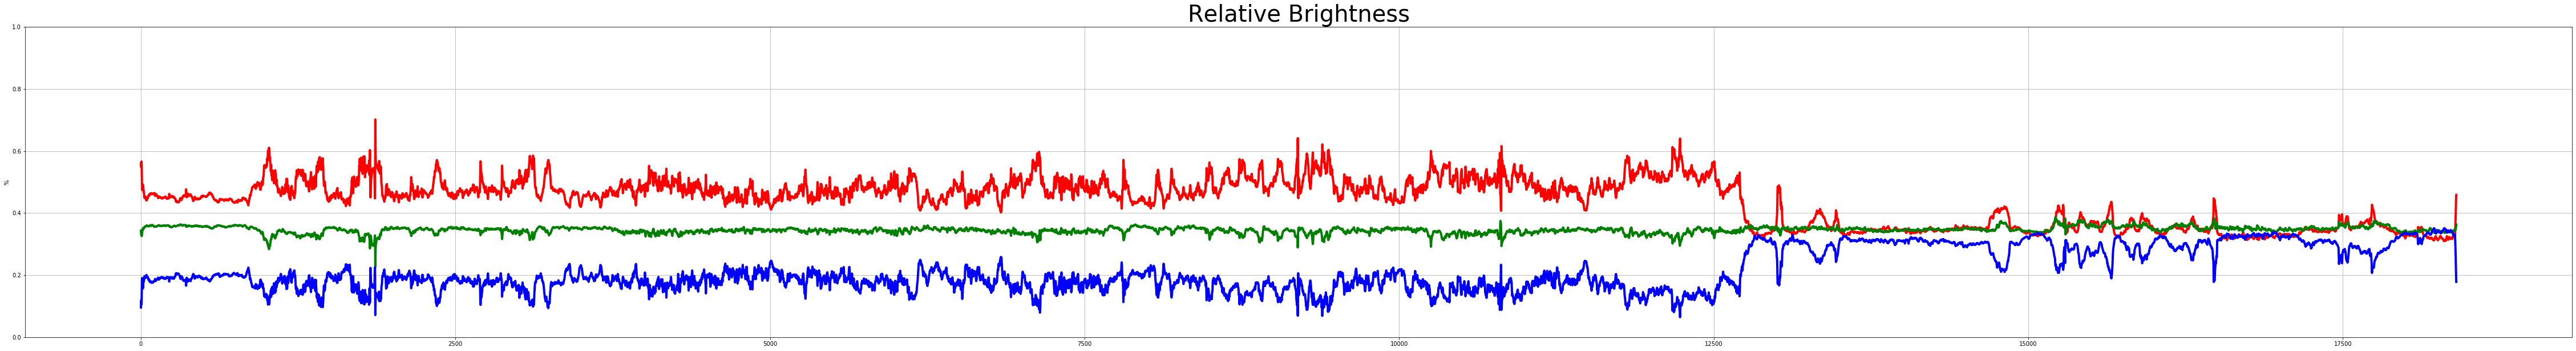

ImageInfo: ch_abs shape = (18402, 3), ch_rel shape = (18402, 3), 18402

In [52]:
showChannels(img1)

In [7]:
h, w, c = img1.shape
channel_absolute = np.empty((0, c), float)
channel_relative = np.empty((0, c), float)
ranges = list()
for i in range(w):
    col_slice = img1[:, i, :]
    all_color = col_slice.sum(axis = 1)
    min_step = 1 / 255
    valid_idx = np.argwhere(all_color >= min_step).ravel()
    valid_range = range(valid_idx[0], valid_idx[-1] + 1)
    ranges.append(valid_range)
    p = np.average(col_slice[valid_range], axis = 0)
    channel_absolute = np.vstack((channel_absolute, p))
    rel = p / np.sum(p)
    channel_relative = np.vstack((channel_relative, rel))

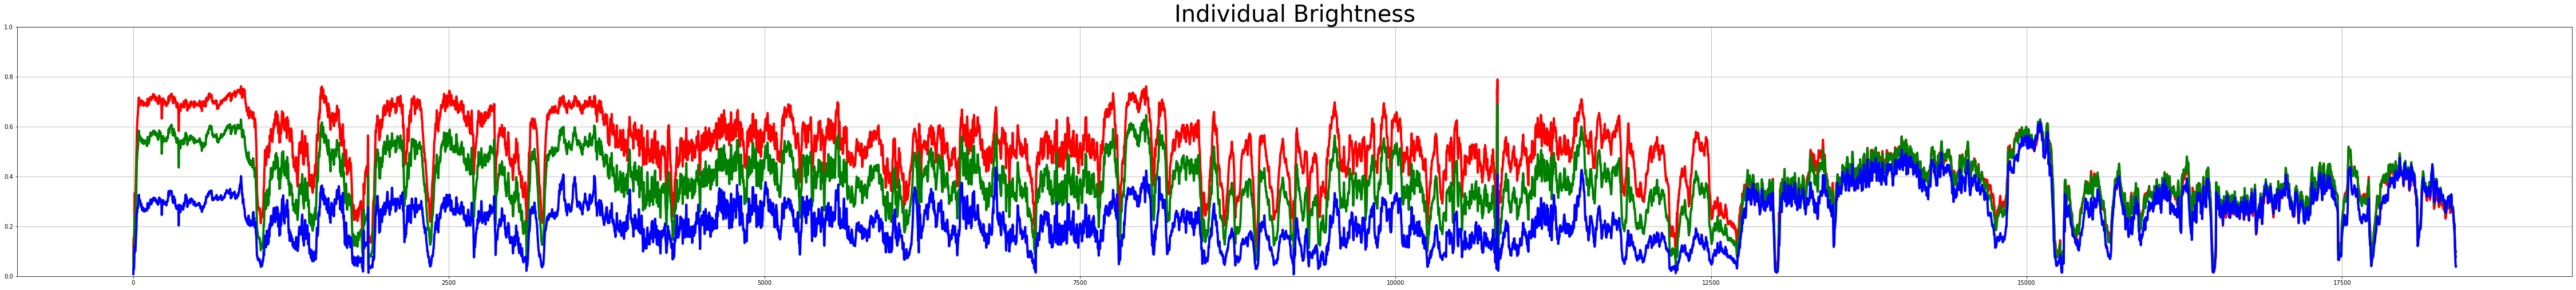

In [12]:
colorIntensity(channel_absolute, 'Individual Brightness', '')

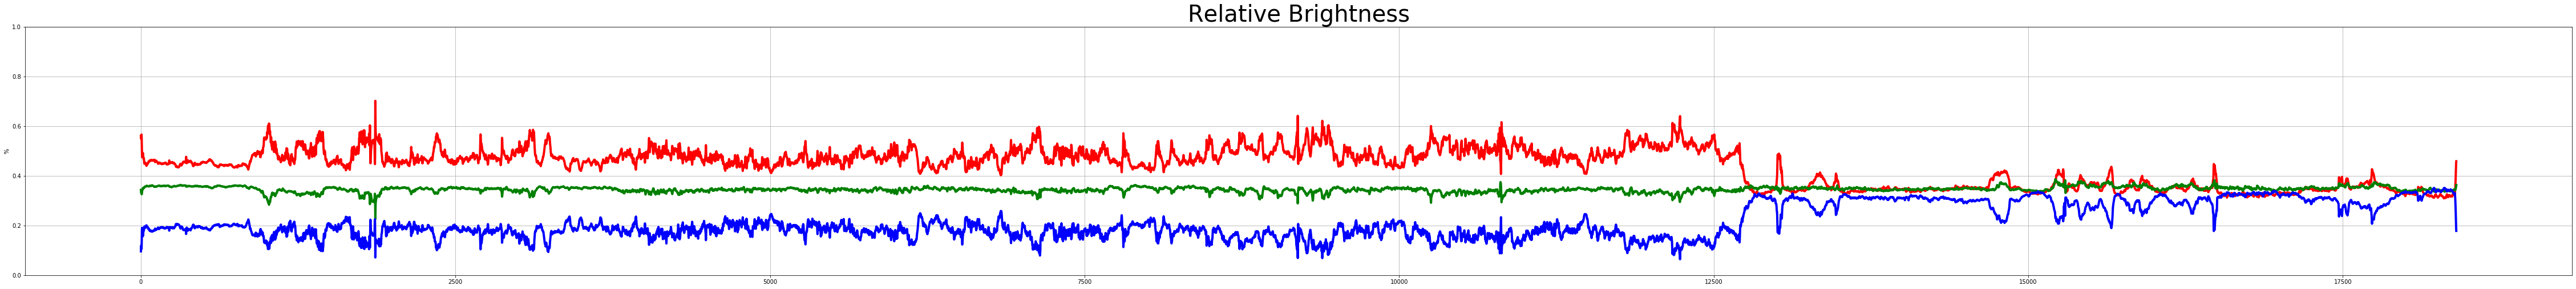

In [13]:
colorIntensity(channel_relative, 'Relative Brightness', '%')

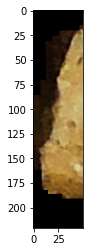

In [25]:
imshow(img1[:, :50, :])